## B2 김한탁 당뇨병 데이터 분석 및 결과 해석

## 1. 라이브러리 

In [1]:
import pandas as pd
# 학습용/평가용 데이터 분리:train, test
from sklearn.model_selection import train_test_split
# 선형회귀모형
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# 평가함수
from sklearn.metrics import r2_score
# Decision Tree 모형
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# graphviz : 나무 구조 시각화 
from sklearn.tree import export_graphviz
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
import matplotlib.pyplot as plt
# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
import matplotlib

# 맑은 고딕 적용
matplotlib.rc("font", family = "NanumGothic")
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

# 작업 디렉터리를 설정
import os
os.chdir('/home/piai/실습파일/BigData분석')

## 2. DIABETES 데이터 설명 및 전처리

### 2.1 데이터 변수 설명

- Y (당뇨 발병 확률점수): 당뇨병 발병 확률을 나타내는 지표이다.  
  
  
- AGE (나이): 당뇨병 발병 위험이 나이와 함께 증가하는 경향이 있다. 나이가 많을수록 당뇨병 발병 위험이 높아지며, 이는 신체의 대사 활동이 감소하고 인슐린 저항성이 증가하기 때문이다.


- GENDER (성별): 성별은 당뇨병 발병 위험에 영향을 미칠 수 있다. 여성은 일반적으로 남성보다 당뇨병에 더 취약한 경향이 있습니다. 이는 여성의 호르몬 수준과 대사 활동의 차이 때문이다.


- BMI (체질량지수): 체질량지수는 체중을 신장의 제곱으로 나눈 값으로, 비만의 정도를 평가하는 지표다. BMI가 높을수록 당뇨병 발병 위험이 높아지는 경향이 있습니다. 고체지방량은 인슐린 저항성을 증가시키고 당뇨병 발병을 촉진할 수 있다.


- BP (평균 혈압): 고혈압은 당뇨병 발병 위험 요인 중 하나다. 고혈압은 혈관을 손상시켜 혈압 조절 메커니즘을 악화시키고 당뇨병 합병증의 발생 위험을 높일 수 있다.


- CHOLESTEROL (혈중 총 콜레스테롤): 고 콜레스테롤 수치는 당뇨병 발병 위험을 증가시킬 수 있다. 고 콜레스테롤 수치는 혈관 벽에 콜레스테롤이 침착되어 혈관을 막히게 하고 심혈관 질환의 발병 위험을 높일 수 있다.


- LDL (저밀도 지질단백질): LDL은 혈액 내의 "나쁜" 콜레스테롤로 알려져 있다. LDL 수치가 높을수록 동맥 경화와 혈관 질환의 발생 위험이 증가하며, 이는 당뇨병 환자에게 더 큰 위험을 초래할 수 있다.


- HDL (고밀도 지질단백질): HDL은 혈액 내의 "좋은" 콜레스테롤로 알려져 있다. HDL 수치가 높을수록 혈관 질환의 발생 위험이 낮아지는 경향이 있으며, 이는 당뇨병 환자에게도 유리한 영향을 미칠 수 있다.


- TCH (총 콜레스테롤 수치): 총 콜레스테롤 수치는 혈액 내의 모든 콜레스테롤 양을 나타낸다. 고 총 콜레스테롤 수치는 당뇨병 발병 위험을 증가시킬 수 있다.


- LTG (라모트리진): 라모트리진은 당뇨병 치료에 사용되는 약물 중 하나로, 혈당 조절을 개선하여 당뇨병 합병증의 발생 위험을 감소시킬 수 있다.


- GLUCOSE (혈당 수치): 혈당 수치는 혈액 내의 포도당(당) 농도를 나타낸다. 고 혈당 수치는 인슐린 저항성을 촉진하고 당뇨병 발병 위험을 증가시킬 수 있다.

In [3]:
df = pd.read_csv("DIABETES.csv", encoding = 'euc-kr')
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


### 2.2 GENDER 변수 One-Hot encoding
* 회귀문제에서 범주형 변수의 효과를 알아보기 위해 GENDER 변수에 대한 One - Hot encoding을 실시하였다.  

* One-Hot encoding은 통계적 모델(선형회귀모형)에서는 숫자로 표기된 범주형 변수의 배수 관계를 끊어줌으로써 의미가 있지만, 통계 이론이 적용되지 않는 비선형 모델인 (의사결정나무, 랜덤포레스트 등)은 크게 영향이 없다.

In [4]:
df_dummy = pd.get_dummies(df['GENDER'], drop_first = True)
df = pd.concat([df, df_dummy],axis=1)

In [5]:
df.drop(columns='GENDER', inplace = True)
df.rename(columns = {2:'GENDER'}, inplace = True)

In [6]:
df.head()

,Y,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,GENDER
0,151,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,1
1,75,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,0
2,141,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,1
3,206,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,0
4,135,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,0


### 2.3 모델에 따른 training data / test data split

##### -다중선형회귀모델의 경우  
: 다중회귀모델은 모델링 과정에서 종속변수('Y')와 독립변수('Y'를 제외한 모든 변수들)을 데이터셋에서 따로 분리하지 않는다.

In [7]:
df_train, df_test = train_test_split(df,test_size = 0.2, random_state = 20240305) 

##### - Ridge, Lasso, Elastic-net, Decision Tree, Random Forest, Gradient Boosting 모델의 경우
: 위의 모델들의 경우, 모델링 과정에서 종속변수와 독립변수를 각각의 파라미터로 사용하기 때문에, 데이터셋에서 따로 분리하였다.

In [8]:
df_y = df["Y"]
df_x = df.drop("Y", axis = 1)

In [9]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y,
                                                                test_size = 0.2, random_state = 20240305) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (353, 10)
train data Y size : (353,)
test data X size : (89, 10)
test data Y size : (89,)


##### - 분리된 다중선형회귀 모형의 데이터 셋과 그외 모델의 데이터 셋 비교  
: 같은 random_state를 이용하여 분리하였기 때문에, 다중선형회귀 모형에서 사용하는 데이터 셋인 df_train은 그 외의 모델에서 사용하는 데이터셋인 df_train_x, df_train_y의 결합된 것과 같은 형태임을 확인할 수 있었다.

In [10]:
df_train.head()

,Y,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,GENDER
135,272,47,31.6,84.0,154,88.0,30.0,5.1,5.1985,105,0
58,170,60,20.4,105.0,198,78.4,99.0,2.0,4.6347,79,0
348,148,57,24.5,93.0,186,96.6,71.0,3.0,4.5218,91,0
75,42,46,23.5,87.0,181,114.8,44.0,4.0,4.7095,98,1
79,113,20,22.9,87.0,191,128.2,53.0,4.0,3.8918,85,0


In [11]:
df_train_x.head()

,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,GENDER
135,47,31.6,84.0,154,88.0,30.0,5.1,5.1985,105,0
58,60,20.4,105.0,198,78.4,99.0,2.0,4.6347,79,0
348,57,24.5,93.0,186,96.6,71.0,3.0,4.5218,91,0
75,46,23.5,87.0,181,114.8,44.0,4.0,4.7095,98,1
79,20,22.9,87.0,191,128.2,53.0,4.0,3.8918,85,0


In [12]:
df_train_y.head()

135    272
58     170
348    148
75      42
79     113
Name: Y, dtype: int64

## 3. 다중선형회귀모형과 규제화 다중선형회귀모형

- 모델이 데이터를 얼마나 잘 설명하는지를 비교하기 위해서, 모든 변수를 사용하여 다중회귀모형, 규제화 다중회귀모형의 test셋에 대한 R2 score를 확인하였다.

### 3.1 다중선형회귀모형

#### - 모든 설명 변수를 이용한 다중선형회귀모형 식은 다음과 같다.
#####  yhat = -359.9093 - 0.1416 * AGE + -21.6149 * GENDER + 5.5009 * BMI + 1.1635 * BP - 1.1058 * CHOLESTEROL + 0.8013 * LDL + 0.5187 * HDL +                                   7.4564*TCH + 66.5308 * LTG + 0.2831 * GLUCOSE 
그러나 AGE, LDL, HDL, TCH, GLUCOSE의 변수는 회귀계수가 유의수준 5%에서 유의하지 않았다는 사실에 주의해야 한다.

In [13]:
reg_model = smf.ols(formula = "Y ~ AGE+ GENDER+ BMI+ BP+ CHOLESTEROL+ LDL+ HDL+ TCH + LTG+ GLUCOSE", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     35.45
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           3.89e-47
Time:                        00:47:37   Log-Likelihood:                -1902.3
No. Observations:                 353   AIC:                             3827.
Df Residuals:                     342   BIC:                             3869.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -359.9093     72.557     -4.960      

##### - 다중선형회귀모형의 R2 스코어

: train data에 대한 R2(결정계수)는 0.509, test data에 대한 R2는 0.54로 나타났다. 이는 train data보다 test data에 대한 모델의 설명력이 더 좋음을 나타낸다.

In [14]:
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", round(r2_score(df_train['Y'], train_pred),3))
print("test data의 결정계수:", round(r2_score(df_test['Y'], test_pred),3))

train data의 결정계수: 0.509
test data의 결정계수: 0.54


### 3.2 Ridge 다중선형회귀모형

#### - 모든 설명 변수를 이용한 Ridge 다중선형회귀모형 식은 다음과 같다.
#####  yhat = -338.7078 - 0.135626*AGE  - 21.326547*GENDER + 5.548128*BMI + 1.163439*BP - 0.909849 * CHOLESTEROL + 0.621817*LDL + 0.302674 * HDL + 7.113789 * TCH + 60.533578 * LTG + 0.291267 * GLUCOSE 

##### - 회귀계수
: 기존의 다중선형회귀모형의 회귀계수에 비해, BP, CLUCOSE 변수를 제외한 모든 변수들의 회귀계수 값이 근소하게 작아졌음을 확인할 수 있다.

In [15]:
ridge = Ridge(random_state=20240305, alpha = 1)
ridge.fit(df_train_x, df_train_y)
df_ridge_coef = pd.DataFrame({"Coef": ridge.coef_}, index = df_train_x.columns)
df_ridge_coef

,Coef
AGE,-0.135626
BMI,5.548128
BP,1.163439
CHOLESTEROL,-0.909849
LDL,0.621817
HDL,0.302674
TCH,7.113786
LTG,60.533578
GLUCOSE,0.291267
GENDER,-21.326547


##### - 상수항(B0)
: 상수항(B0)는 약 -338.7078으로 확인되었다.

In [16]:
print(ridge.intercept_)

-338.70784976775195


#### - 변수들의 회귀계수 시각화
: LTG, GENDER, BMI, TCH, BP의 순으로 Y에 대한 독립변수의 영향력이 큰 것으로 나타났다.

<Axes: >

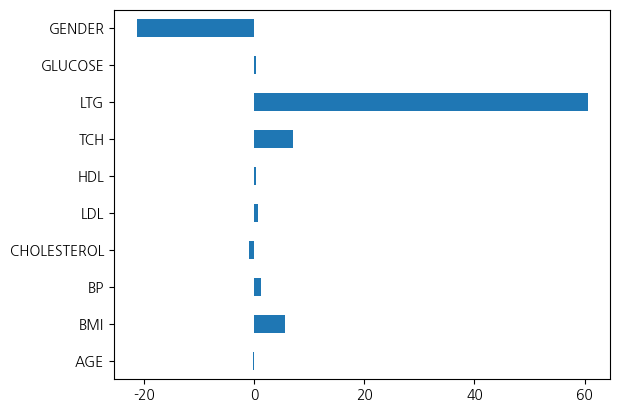

In [17]:
df_ridge_coef.plot.barh(y = "Coef", legend = False)

#### - Ridge 모델의 R2 스코어
: train data에 대한 R2(결정계수)는 0.509, test data에 대한 R2는 0.54로 나타났다. 이는 train data보다 test data에 대한 모델의 설명력이 더 좋음을 나타낸다.

In [18]:
train_pred = ridge.predict(df_train_x)
test_pred = ridge.predict(df_test_x)
print("train data의 결정계수:", round(r2_score(df_train_y, train_pred), 3))
print("test data의 결정계수:", round(r2_score(df_test_y, test_pred), 3))

train data의 결정계수: 0.509
test data의 결정계수: 0.54


### 3.3 LASSO

#### - 모든 설명 변수를 이용한 Lasso 다중선형회귀모형 식은 다음과 같다.
#####  yhat = -228.7518 - 0.118358*AGE  - 16.205681*GENDER + 5.752172*BMI + 1.124641*BP + 0.059713 * CHOLESTEROL - 0.183890*LDL - 0.938599* HDL + 1.168339 * TCH + 34.275545 * LTG + 0.317195 * GLUCOSE 

##### - 회귀계수
: 기존의 다중선형회귀모형의 회귀계수에 비해, BMI, HDL, BP, CLUCOSE 변수를 제외한 모든 변수들의 회귀계수의 절댓값이 근소하게 작아졌음을 확인할 수 있다.

In [19]:
lasso = Lasso(random_state=20240305, alpha = 1)
lasso.fit(df_train_x, df_train_y)
df_lasso_coef = pd.DataFrame({"Coef": lasso.coef_}, index = df_train_x.columns)
df_lasso_coef

,Coef
AGE,-0.118358
BMI,5.752172
BP,1.124641
CHOLESTEROL,0.059713
LDL,-0.183890
HDL,-0.938599
TCH,1.168339
LTG,34.275545
GLUCOSE,0.317195
GENDER,-16.205681


##### - 상수항(B0)
: 상수항(B0)는 약 -228.7518으로 확인되었다.

In [20]:
print(lasso.intercept_)

-228.7517727603106


#### - 변수들의 회귀계수 시각화
: LTG, GENDER, BMI, TCH, BP, HDL의 순으로 Y에 대한 독립변수의 영향력이 큰 것으로 나타났다.

<Axes: >

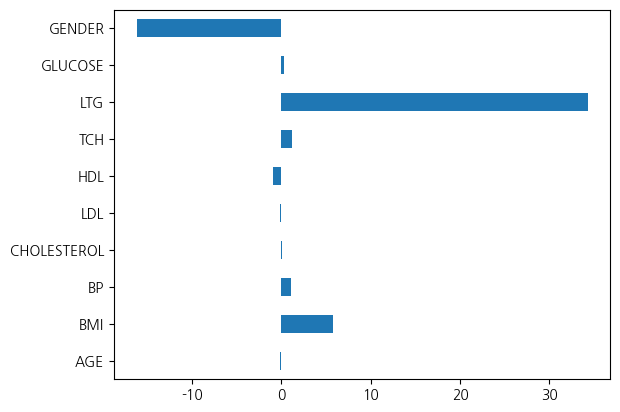

In [21]:
df_lasso_coef.plot.barh(y = "Coef", legend = False)

#### - LASSO 모델의 R2 스코어
: train data에 대한 R2(결정계수)는 0.509, test data에 대한 R2는 0.32로 나타났다. 이는 train data보다 test data에 대한 모델의 설명력이 더 좋음을 나타낸다.

In [22]:
train_pred = lasso.predict(df_train_x)
test_pred = lasso.predict(df_test_x)
print("train data의 결정계수:", round(r2_score(df_train_y, train_pred), 3))
print("test data의 결정계수:", round(r2_score(df_test_y, test_pred), 3))

train data의 결정계수: 0.502
test data의 결정계수: 0.532


### 3.4 ELASTIC NET

#### - 모든 설명 변수를 이용한 ELASTIC NET 다중선형회귀모형 식은 다음과 같다.
#####  yhat = -122.5559 - 0.126648 * AGE  - 5.3438 * GENDER + 6.011997 * BMI + 1.064349 * BP + 1.086744 * CHOLESTEROL - 1.154058 * LDL - 1.883668* HDL + 0.518433 * TCH + 2.914695 * LTG + 0.324421 * GLUCOSE 

##### - 회귀계수
: 기존의 다중선형회귀모형의 회귀계수에 비해, BMI, LDL, CHOLESTEROL, CLUCOSE 변수를 제외한 모든 변수들의 회귀계수의 절댓값이 근소하게 작아졌음을 확인할 수 있다.

In [23]:
elastic = ElasticNet(random_state=20240305, alpha = 1, l1_ratio = 0.5)
elastic.fit(df_train_x, df_train_y)
df_elastic_coef = pd.DataFrame({"Coef": elastic.coef_}, index = df_train_x.columns)
df_elastic_coef

,Coef
AGE,-0.126648
BMI,6.011997
BP,1.064349
CHOLESTEROL,1.086744
LDL,-1.154058
HDL,-1.883668
TCH,0.518433
LTG,2.914695
GLUCOSE,0.324421
GENDER,-5.343896


##### - 상수항(B0)
: 상수항(B0)는 약 -122.5560으로 확인되었다.

In [24]:
print(elastic.intercept_)

-122.55598752589822


#### - 변수들의 회귀계수 시각화
: BMI, GENDER, LTG, HDL, LDL, CHILESTEROL, BP의 순으로 Y에 대한 독립변수의 영향력이 큰 것으로 나타났다.

<Axes: >

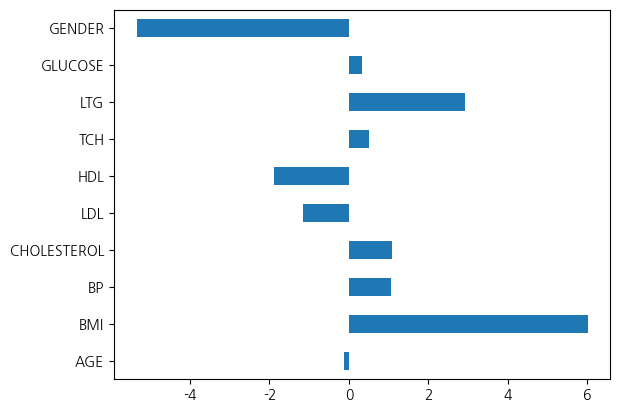

In [25]:
df_elastic_coef.plot.barh(y = "Coef", legend = False)

#### - ELASTIC NET 모델의 R2 스코어
: train data에 대한 R2(결정계수)는 0.479, test data에 대한 R2는 0.508로 나타났다. 이는 train data보다 test data에 대한 모델의 설명력이 더 좋음을 나타낸다.

In [26]:
train_pred =elastic.predict(df_train_x)
test_pred = elastic.predict(df_test_x)
print("train data의 결정계수:", round(r2_score(df_train_y, train_pred), 3))
print("test data의 결정계수:", round(r2_score(df_test_y, test_pred), 3))

train data의 결정계수: 0.479
test data의 결정계수: 0.508


## 4. Decision Tree

#### - Decision Tree default 모델 R2 성능확인
: training set에 대한 R2는 1로, 데이터에 대한 설명이 완벽히 가능하지만, test set에 대해 음수의 값으로 데이터 분할이 정상적이지 않았음을 알 수 있다.

In [27]:
tree_uncustomized = DecisionTreeRegressor(random_state=240305)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: -0.119


#### - 기본 모델 파라미터 확인

In [28]:
tree_uncustomized.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 240305,
 'splitter': 'best'}

#### - min_samples_leaf 파라미터 조정
: min_samples_leaf가 13일 때, train도 잘설명하면서, test도 잘 설명한다고 생각했다. 따라서 모델을 일반화 시키기 위해 min_samples_leaf를 13으로 결정하였다.

In [29]:
train_score = []; test_score = [ ]
para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=240305
                                 , min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [30]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,-0.119
1,2,0.938,0.046
2,3,0.870,0.233
3,4,0.803,0.144
4,5,0.773,0.176
5,6,0.746,0.216
6,7,0.721,0.185
7,8,0.688,0.269
8,9,0.665,0.285
9,10,0.652,0.282


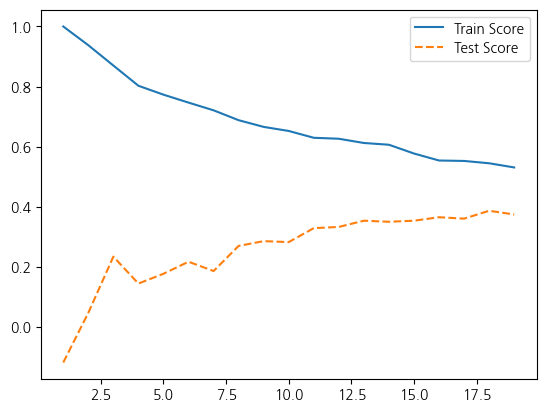

In [31]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

#### - min_samples_split 파라미터 조정
: min_samples_leaf가 13이고 min_samples_split이 10일 때, train도 잘설명하면서 test도 잘 설명한다고 생각했다. 따라서 모델을 일반화 시키기 위해 min_samples_split를 10으로 결정하였다.

In [32]:
train_score = []; test_score = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=240305, min_samples_leaf=13
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [33]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.612,0.353
1,6,0.612,0.353
2,8,0.612,0.353
3,10,0.612,0.353
4,12,0.612,0.353
5,14,0.612,0.353
6,16,0.612,0.353
7,18,0.612,0.353
8,20,0.612,0.353
9,22,0.612,0.353


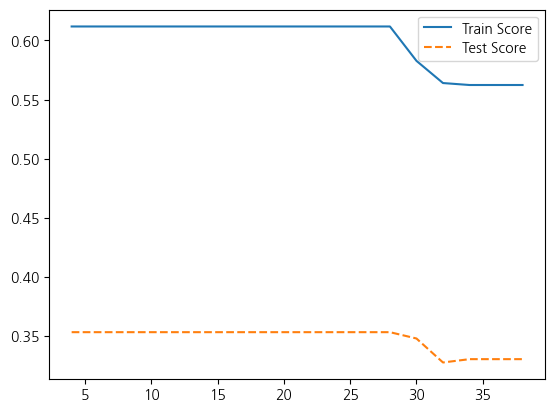

In [34]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

#### - max depth 파라미터 조정
: min_samples_leaf가 13이고 min_samples_split이 10, max_depth가 5일 때, train도 잘설명하면서 test도 잘 설명한다고 생각했다. 따라서 모델을 일반화 시키기 위해 max_depth를 5로 결정하였다.

In [35]:
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=240305, min_samples_leaf=13, min_samples_split=10
                                  , max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [36]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.283,0.247
1,2,0.441,0.347
2,3,0.510,0.348
3,4,0.552,0.379
4,5,0.585,0.303
5,6,0.611,0.349
6,7,0.612,0.353
7,8,0.612,0.353
8,9,0.612,0.353
9,10,0.612,0.353


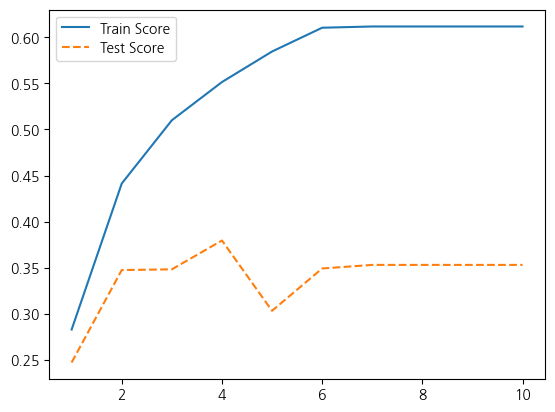

In [37]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

#### - 조정된 모델의 파라미터

In [38]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(min_samples_leaf = 13, min_samples_split = 10, max_depth = 5, random_state=20240305)
tree_final.fit(df_train_x, df_train_y)
tree_final.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 13,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 20240305,
 'splitter': 'best'}

##### - 의사결정나무 시각화
총 16개의 조건으로 분기하였으며, 조정된 파라미터에 따라 트리의 높이는 5에 맞게 생성되었다. 그러나 min_samples_leaf, min_samples_split은 각각 13, 10으로 조정되었는데, 이것은 사실 생길 수 없는 트리의 모형이다.

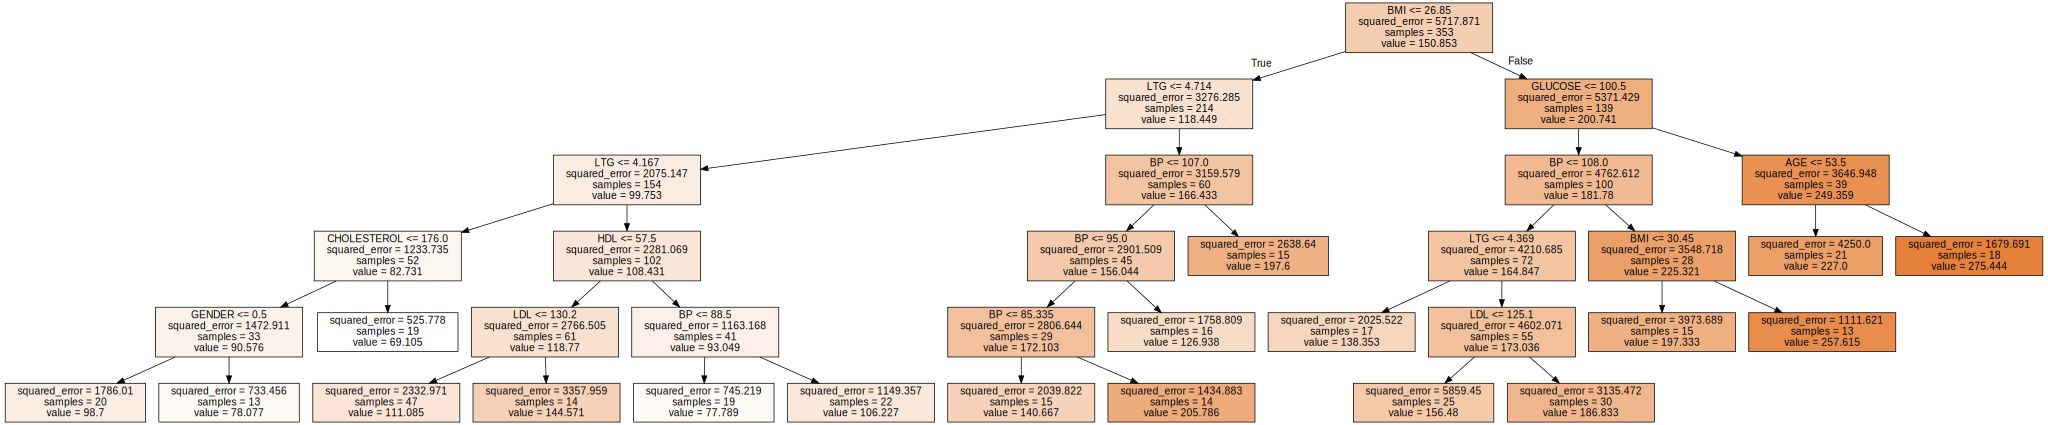

<Figure size 500x500 with 0 Axes>

In [39]:
export_graphviz(tree_final, out_file="tree_final.dot",
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
plt.figure(figsize = (5, 5))
display(graphviz.Source(dot_graph))

#### - 변수 중요도 & 시각화
: Y를 구분하는데 BMI의 영향력이 0.505로 가장 높음을 알 수 있었다. 그 외에도 LTG, BP, CLUCOSE의 변수가 영향력이 있는 것으로 나타났고, TCH는 Y를 구분하는데 영향을 전혀 미치지 못함이 나타났다.

In [40]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,BMI,0.505
7,LTG,0.195
2,BP,0.130
8,GLUCOSE,0.109
4,LDL,0.021
0,AGE,0.019
5,HDL,0.014
3,CHOLESTEROL,0.005
9,GENDER,0.003
6,TCH,0.000


Text(0, 0.5, '변수')

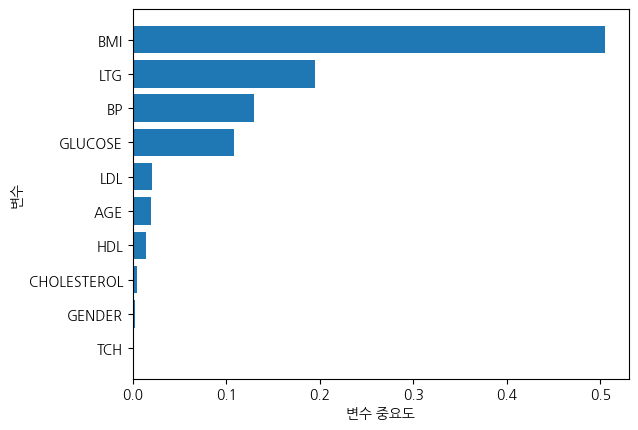

In [41]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

#### - Decision Tree 모델의 R2 스코어
: train data에 대한 R2(결정계수)는 0.585, test data에 대한 R2는 0.303으로 나타났다. 이는 test data보다 train data에 대한 모델의 설명력이 더 좋음을 나타낸다. 이는 과적합이 되어 있다고 볼 수 있으며, test data에 대한 결정계수의 개선의 여지가 있다.

In [42]:
train_pred = tree_final.predict(df_train_x)
test_pred = tree_final.predict(df_test_x)
print("train data의 결정계수:", round(r2_score(df_train_y, train_pred), 3))
print("test data의 결정계수:", round(r2_score(df_test_y, test_pred), 3))

train data의 결정계수: 0.585
test data의 결정계수: 0.303


## Random Forest

#### - RandomForest default 모델 R2 성능확인
: training set에 대한 R2는 0.919으로, 데이터에 대해 설명력이 매우 높지만, test set에 대한 데이터는 0.441로 training set에 대한 설명력에 비해 매우 낮은 수치를 보였다. 이것은 과적합을 의미하며, 파라미터를 조정하여 training set에 대한 설명력은 낮추되, test set에 대한 설명력을 높이는 방법으로 해결할 수 있다.

In [43]:
rf_uncustomized = RandomForestRegressor(random_state=20240305)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.919
Score on test set: 0.441


#### - 기본 모델 파라미터 확인

In [44]:
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 20240305,
 'verbose': 0,
 'warm_start': False}

#### - n_estimators 파라미터 조정
: n_estimators가 100일 때, train도 잘설명하면서, test도 잘 설명한다고 생각했다. 따라서 모델을 일반화 시키기 위해 n_estimators를 100으로 결정하였다.

In [45]:
train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 20240305)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [46]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.891,0.362
1,20,0.909,0.405
2,30,0.912,0.422
3,40,0.914,0.436
4,50,0.916,0.440
5,60,0.915,0.440
6,70,0.915,0.439
7,80,0.917,0.439
8,90,0.917,0.441
9,100,0.919,0.441


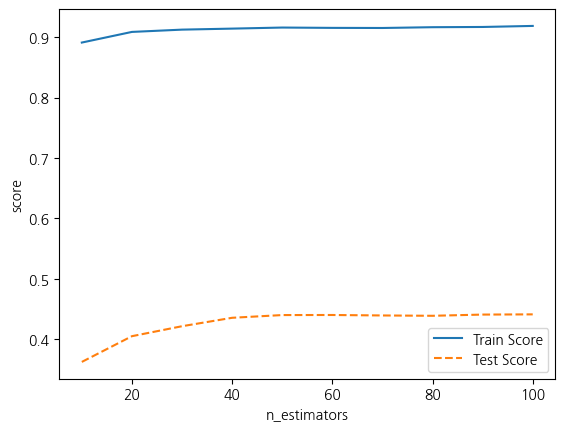

In [47]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

#### - min_samples_leaf 파라미터 조정
: min_samples_leaf가 4일 때, train도 잘설명하면서, test도 잘 설명한다고 생각했다. 따라서 모델을 일반화 시키기 위해 min_samples_leaf를 4으로 결정하였다.

In [48]:
train_score = []; test_score = []
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=20240305, n_estimators = 100,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.919,0.441
1,2,0.886,0.455
2,3,0.840,0.473
3,4,0.793,0.479
4,5,0.755,0.481
5,6,0.724,0.484
6,7,0.699,0.492
7,8,0.675,0.493
8,9,0.658,0.494
9,10,0.640,0.491


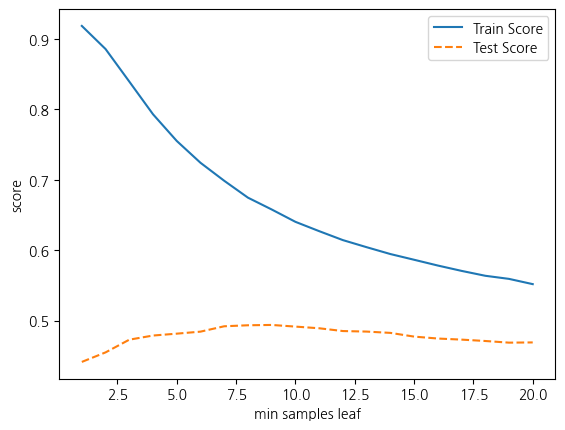

In [49]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

#### - min_samples_split 파라미터 조정
: min_samples_split이 4일 때, train도 잘설명하면서, test도 잘 설명한다고 생각했다. 따라서 모델을 일반화 시키기 위해 min_samples_split 결정하였다.

In [50]:
train_score = []; test_score = []
para_split = [n_split * 2for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=20240305, n_estimators = 100, min_samples_leaf = 4,
                               min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.793,0.479
1,6,0.793,0.479
2,8,0.793,0.479
3,10,0.771,0.476
4,12,0.752,0.480
5,14,0.734,0.478
6,16,0.717,0.480
7,18,0.703,0.479
8,20,0.688,0.477
9,22,0.674,0.477


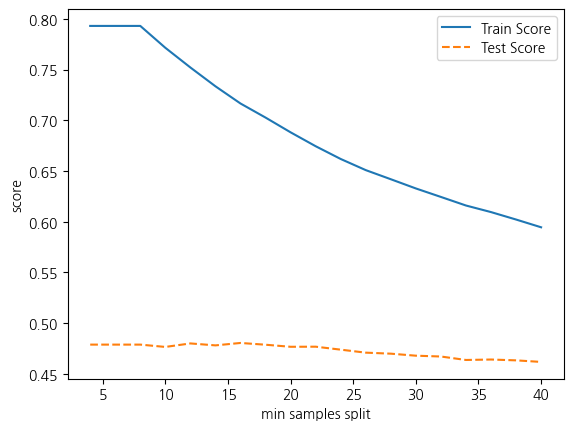

In [51]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

#### - max_depth 파라미터 조정
: max_depth이 7일 때, train도 잘설명하면서, test도 잘 설명한다고 생각했다. 따라서 모델을 일반화 시키기 위해 max_depth 결정하였다.

In [52]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=20240305, n_estimators = 100,
                               min_samples_leaf = 4, min_samples_split = 4,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.385,0.372
1,2,0.499,0.447
2,3,0.573,0.469
3,4,0.641,0.481
4,5,0.701,0.482
5,6,0.744,0.481
6,7,0.771,0.478
7,8,0.784,0.476
8,9,0.790,0.477
9,10,0.792,0.478


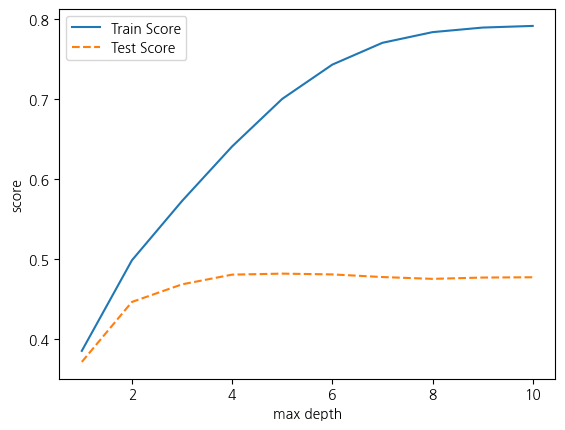

In [53]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

##### - 조정된 모델의 파라미터

In [54]:
v_feature_name = df_train_x.columns
rf_final = RandomForestRegressor( n_estimators = 100, min_samples_leaf = 4, min_samples_split = 4, max_depth =7, random_state=20240305 )
rf_final.fit(df_train_x, df_train_y)
rf_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 20240305,
 'verbose': 0,
 'warm_start': False}

#### - 변수 중요도 & 시각화
: Y를 구분하는데 BMI, LTG의 영향력이 0.331로 가장 높음을 알 수 있었다. 그 외에도 BP의 변수가 영향력이 있는 것으로 나타났고, GENDER는 Y를 구분하는데 영향을 전혀 미치지 못함이 나타났다.

In [55]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,BMI,0.331
7,LTG,0.330
2,BP,0.105
8,GLUCOSE,0.059
5,HDL,0.042
4,LDL,0.040
0,AGE,0.037
3,CHOLESTEROL,0.033
6,TCH,0.015
9,GENDER,0.009


Text(0, 0.5, '변수')

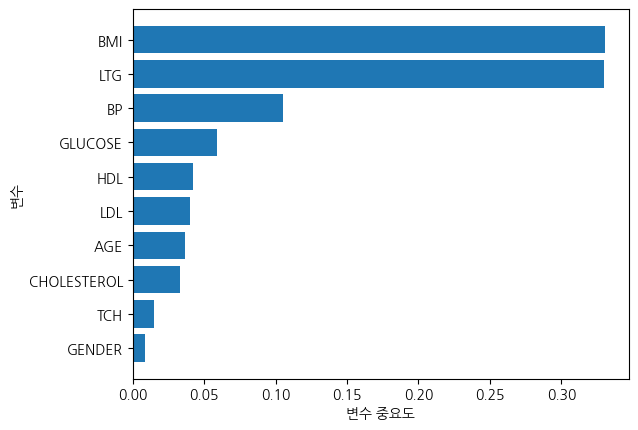

In [56]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

#### - Random Forest 모델의 R2 스코어
: train data에 대한 R2(결정계수)는 0.771, test data에 대한 R2는 0.478로 나타났다. 이는 test data보다 train data에 대한 모델의 설명력이 더 좋음을 나타낸다. 이는 과적합이 되어 있다고 볼 수 있으며, test data에 대한 결정계수의 개선의 여지가 있다.

In [57]:
train_pred = rf_final.predict(df_train_x)
test_pred = rf_final.predict(df_test_x)
print("train data의 결정계수:", round(r2_score(df_train_y, train_pred), 3))
print("test data의 결정계수:", round(r2_score(df_test_y, test_pred), 3))

train data의 결정계수: 0.771
test data의 결정계수: 0.478


## Gradient Boosting

#### - Gradient Boosting default 모델 R2 성능확인
: training set에 대한 R2는 0.838으로, 데이터에 대해 설명력이 매우 높지만, test set에 대한 데이터는 0.431로 training set에 대한 설명력에 비해 매우 낮은 수치를 보였다. 이것은 과적합을 의미하며, 파라미터를 조정하여 training set에 대한 설명력은 낮추되, test set에 대한 설명력을 높이는 방법으로 해결할 수 있다.

In [58]:
gb_uncustomized = GradientBoostingRegressor(random_state=20240305)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(gb_uncustomized.score (df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_uncustomized.score (df_test_x, df_test_y)))

Score on training set: 0.838
Score on test set: 0.431


#### - 기본 모델 파라미터 확인

In [59]:
gb_uncustomized.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 20240305,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### - n_estimators 파라미터 조정
: n_estimators가 80일 때, train도 잘설명하면서, test도 잘 설명한다고 생각했다. 따라서 모델을 일반화 시키기 위해 n_estimators를 80으로 결정하였다.

In [60]:
train_score = []; test_score = []
# n_estimatos: 트리 수 변경(10~100)
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 20240305, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.509,0.392
1,20,0.636,0.447
2,30,0.694,0.455
3,40,0.731,0.460
4,50,0.760,0.453
5,60,0.779,0.447
6,70,0.795,0.442
7,80,0.811,0.441
8,90,0.825,0.429
9,100,0.838,0.431


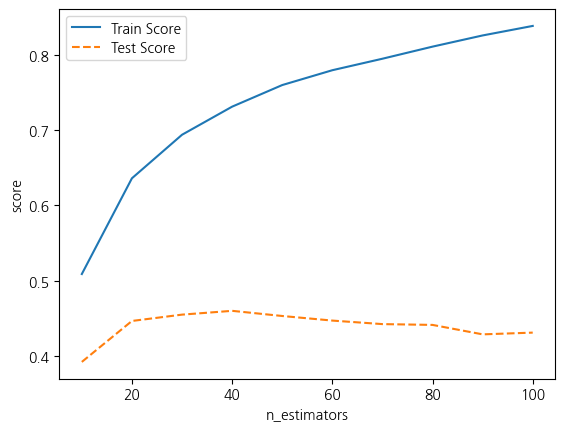

In [61]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

#### - min_samples_leaf 파라미터 조정
: min_samples_leaf가 16일 때, train도 잘설명하면서, test도 잘 설명한다고 생각했다. 따라서 모델을 일반화 시키기 위해 min_samples_leaf를 16으로 결정하였다.

In [62]:
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수 
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=20240305, n_estimators = 80,
                                   min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.811,0.441
1,2,0.818,0.464
2,3,0.809,0.459
3,4,0.802,0.432
4,5,0.793,0.429
5,6,0.793,0.450
6,7,0.794,0.452
7,8,0.781,0.450
8,9,0.783,0.448
9,10,0.780,0.460


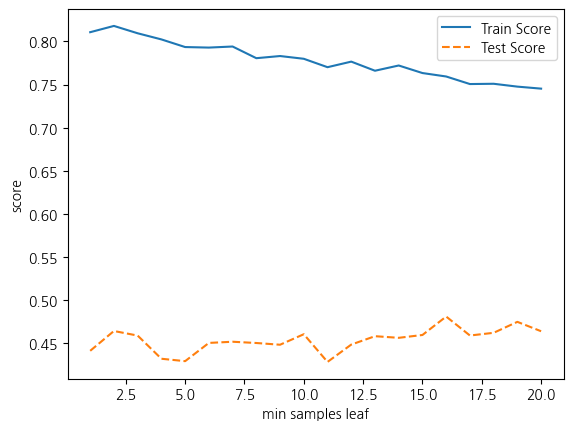

In [63]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

#### - min_samples_split 파라미터 조정
: min_samples_split가 10일 때, train도 잘설명하면서, test도 잘 설명한다고 생각했다. 따라서 모델을 일반화 시키기 위해 min_samples_split을 10으로 결정하였다.

In [64]:
train_score = []; test_score = []
# min_samples_split: 분할하기 위한 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=20240305, n_estimators = 80, min_samples_leaf = 16,
                                   min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.759,0.481
1,4,0.759,0.481
2,6,0.759,0.481
3,8,0.759,0.481
4,10,0.759,0.481
5,12,0.759,0.481
6,14,0.759,0.481
7,16,0.759,0.481
8,18,0.759,0.481
9,20,0.759,0.481


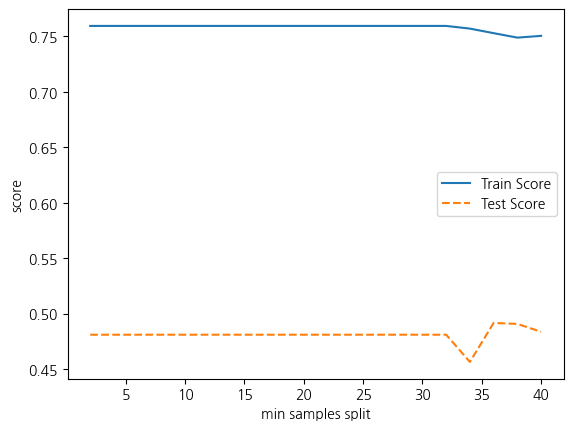

In [65]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

#### - max_depth 파라미터 조정
: max_depth가 3일 때, train도 잘설명하면서, test도 잘 설명한다고 생각했다. 따라서 모델을 일반화 시키기 위해 max_depth을 3으로 결정하였다.

In [66]:
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=20240305, n_estimators = 80, min_samples_leaf = 16,
                                   min_samples_split = 10, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.567,0.479
1,2,0.670,0.486
2,3,0.759,0.481
3,4,0.825,0.456
4,5,0.872,0.455
5,6,0.897,0.447
6,7,0.912,0.436
7,8,0.923,0.427
8,9,0.926,0.439
9,10,0.931,0.414


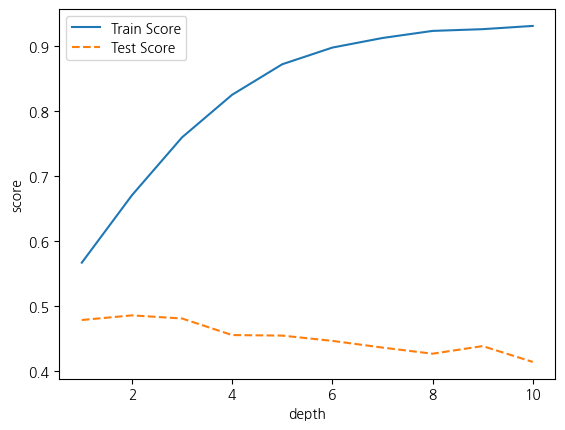

In [67]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("depth")
plt.legend()

#### - learning rate 파라미터 조정
: learning_rate가 0.1일 때, train도 잘설명하면서, test도 잘 설명한다고 생각했다. 따라서 모델을 일반화 시키기 위해 learning_rate을 0.1으로 결정하였다.

In [68]:
train_score = []; test_score = []
# learning rate: 학습률 변경 0.1 ~ 0.9
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=20240305, n_estimators = 80, min_samples_leaf = 16,
                                   min_samples_split = 10, max_depth = 3, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.759,0.481
1,0.2,0.833,0.450
2,0.3,0.893,0.431
3,0.4,0.930,0.338
4,0.5,0.949,0.359
5,0.6,0.962,0.325
6,0.7,0.968,0.320
7,0.8,0.981,0.211
8,0.9,0.985,0.202


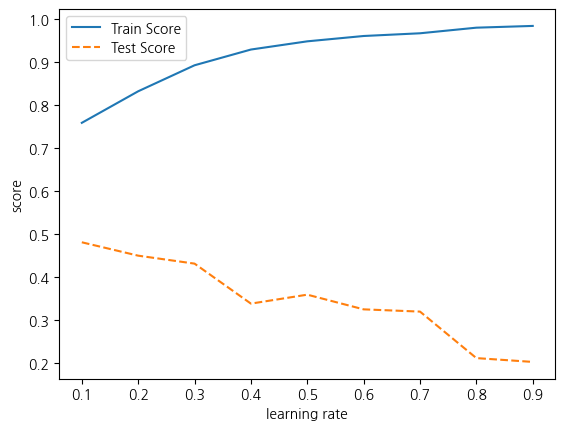

In [69]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

##### - 조정된 모델의 파라미터

In [70]:
v_feature_name = df_train_x.columns
gb_final = GradientBoostingRegressor(random_state=20240305, n_estimators = 80, min_samples_leaf = 16,
                                     min_samples_split = 10, max_depth = 3, learning_rate = 0.1)
gb_final.fit(df_train_x, df_train_y)
gb_final.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 16,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_iter_no_change': None,
 'random_state': 20240305,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### - 변수 중요도 & 시각화
: Y를 구분하는데 BMI이 0.353로 가장 높음을 알 수 있었다. 그 외에이 LTG가 0.307로 영향력이 높게 나왔고, 그 뒤로 BP의 변수가 영향력이 있는 것으로 나타났다.

In [71]:
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,BMI,0.353
7,LTG,0.307
2,BP,0.113
8,GLUCOSE,0.068
0,AGE,0.038
5,HDL,0.033
4,LDL,0.028
3,CHOLESTEROL,0.024
9,GENDER,0.019
6,TCH,0.017


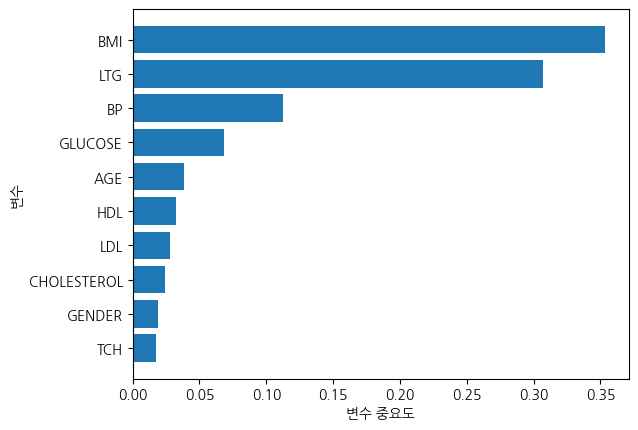

In [72]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.show()

#### - Gradient Boosting 모델의 R2 스코어
: train data에 대한 R2(결정계수)는 0.759, test data에 대한 R2는 0.481로 나타났다. 이는 test data보다 train data에 대한 모델의 설명력이 더 좋음을 나타낸다. 이는 과적합이 되어 있다고 볼 수 있으며, test data에 대한 결정계수의 개선의 여지가 있다.

In [73]:
gb_final = GradientBoostingRegressor(random_state=20240305, n_estimators = 80, min_samples_leaf = 16,
                                     min_samples_split = 10, max_depth = 3, learning_rate = 0.1)
gb_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.759
Score on test set: 0.481


## 모델 평가

##### - 파리미터가 조정된 모델

In [74]:
lr_model = smf.ols(formula = "Y ~ AGE+ GENDER+ BMI+ BP+ CHOLESTEROL+ LDL+ HDL+ TCH + LTG+ GLUCOSE", data = df_train)
lr_result = lr_model.fit()

# Decision Tree
dt_model = DecisionTreeRegressor(min_samples_leaf = 13, min_samples_split = 10, max_depth = 5, random_state=20240305)
dt_model.fit(df_train_x, df_train_y)

# Random Forest
rf_model = RandomForestRegressor( n_estimators = 100, min_samples_leaf = 4, min_samples_split = 4, max_depth =7, random_state=20240305 )
rf_model.fit(df_train_x, df_train_y)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=20240305, n_estimators = 80, min_samples_leaf = 16,
                                     min_samples_split = 10, max_depth = 3, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(min_samples_leaf=16, min_samples_split=10,
                          n_estimators=80, random_state=20240305)

In [75]:
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
# 평가 리스트 초기화
mse, rmse, mae, mape = [],[],[],[]

# 회귀분석예측
lr_y_pred = lr_result.predict(df_test)

# 평가
mse.append(mean_squared_error(df_test['Y'], lr_y_pred))
rmse.append(mean_squared_error(df_test_y, lr_y_pred, squared=False))
mae.append(mean_absolute_error(df_test['Y'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Y'], lr_y_pred))

# 의사결정나무예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(mean_squared_error(df_test_y, dt_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

# 랜덤포레스트예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(mean_squared_error(df_test_y, rf_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

# 그래디언트부스팀예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(mean_squared_error(df_test_y, gb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

##### - 모델별 예측성능 비교
결정계수가 높은 모델인 회귀모형의 MSE, RMSE, MAE, MAPE의 값 역시 작게 나왔다.  
그 뒤로 랜덤 포레스트와 그래디언트 부스팅의 평가지표들의 값이 비슷한 점을 통해 예측성능이 비슷함을 알 수 있었고, 의사결정나무가 제일 낮은 결정계수 값을 가지며 평가지표들 또한 높은 값을 가진다는 점을 통해 가장 예측 성능이 나쁨을 확인할 수 있다.

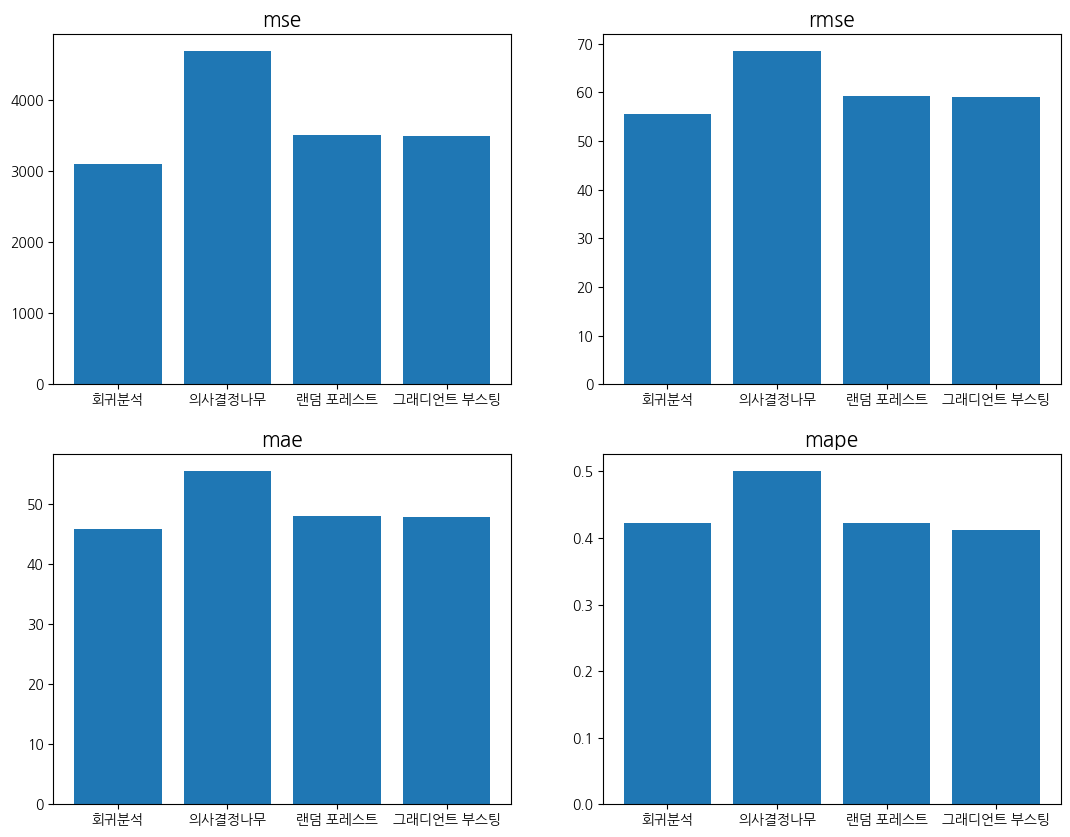

In [76]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)